### Low CR repeats
Attempting to see repeats needed per coupling rate to get back the strand

In [1]:
%load_ext autoreload
%autoreload 2

In [1]:

from synthesis import NaiveSynthesisModel
from Levenshtein import ratio, distance
from strand_reconstruction import make_prediction, majority_merge, align
from evaluation import get_recovery_rate
from random import sample
from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt
import utils
from clustering import cluster_strands

In [2]:
t = np.array([utils.create_random_strand(200) for i in range(200)])
s = np.array([utils.create_random_strand(200) for i in range(200)])

In [4]:
l = distance(t, s)

In [5]:
l

200

In [3]:
synthesis_model = NaiveSynthesisModel(coupling_rate=0.8, strand_length=110, repeats=10000, capping=False)
original_strand = synthesis_model.strand

In [4]:
synthesised_strands = synthesis_model.simulate_synthesis()

In [11]:
error_by_position = np.zeros(len(original_strand))
for i in tqdm(synthesised_strands):

    aligned = align(original_strand, i)
    positional_error = [aligned.indices[0][ind] for ind, i in enumerate(aligned.indices[1]) if i == -1]

    for i in positional_error:
        error_by_position[i] += 1

  0%|          | 0/10000 [00:00<?, ?it/s]

KeyboardInterrupt: 

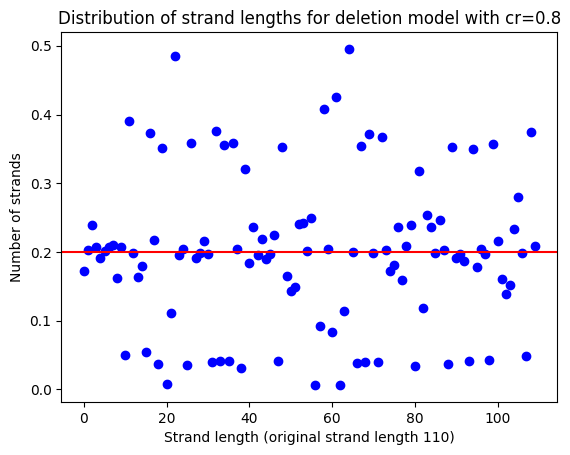

In [14]:
plt.plot(error_by_position/5458 , 'bo')
plt.title("Distribution of strand lengths for deletion model with cr=0.8")
plt.xlabel("Strand length (original strand length 110)")
plt.ylabel("Number of strands")
plt.axhline(0.2, color='r')

## Old method - using multiple alignment

In [24]:

# Iterating over coupling rates

coupling_rates = np.arange(0.9, 0.8, -0.005)
n2_repeats_for_full_recovery = []
#print(coupling_rates)
experiment_repeats = 5
strands_to_multiple_align = 40

for cr in coupling_rates:
    repeats_at_cr = []
    for experiment_repeat in range(experiment_repeats):
        synthesis_model = NaiveSynthesisModel(coupling_rate=cr, strand_length=200, repeats=500, capping=False)
        original_strand = synthesis_model.strand
        strands = synthesis_model.simulate_synthesis()
        for i in range(100, 400, 5):
            
            if i > strands_to_multiple_align:
                candidates = []
                for k in range(0, i, strands_to_multiple_align):
                    if k + strands_to_multiple_align > i:
                        candidates.append(make_prediction(strands[k: i], sample_size=i-k))
                    else:
                        candidates.append(make_prediction(strands[k: k + strands_to_multiple_align]))
                candidate = make_prediction(candidates, len(candidates))
                #candidate = majority_merge(candidates, weight=0)
            else:
                sampled_strands = sample(strands, i)
                candidate = make_prediction(sampled_strands, len(sampled_strands))
            
            edit_distance = distance(candidate, original_strand)
            recovery = get_recovery_rate(candidate, original_strand)

            if recovery == 1.0:
                repeats_at_cr.append(i)
                break
        
    mean_strands_reqd = np.mean(repeats_at_cr)
    print(f"Coupling rate {cr}, strands reqd {mean_strands_reqd}")
    n2_repeats_for_full_recovery.append(mean_strands_reqd)
        
        
        #print(edit_distance)
        #print(recovery)
        #print(align(candidate, original_strand, identity=False).format())
        #print()

KeyboardInterrupt: 

Text(0.5, 1.0, 'Number of repeats required per coupling rate')

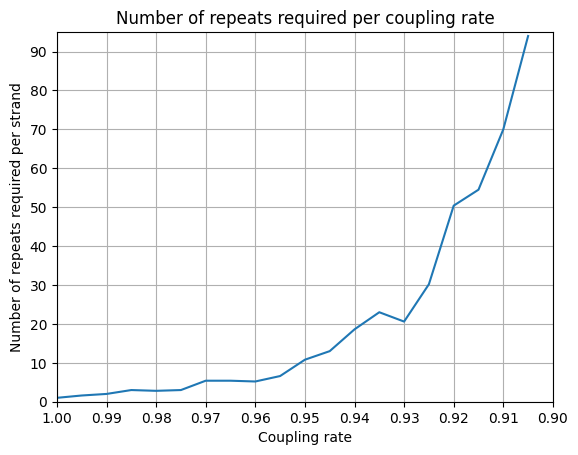

In [ ]:
plt.plot(coupling_rates, n_repeats_for_full_recovery)
plt.xlabel("Coupling rate")
plt.ylabel("Number of repeats required per strand")
plt.xticks(x_ticks)
plt.yticks(y_ticks)
plt.grid()
plt.gca().invert_xaxis()
plt.xlim(1, 0.90)
plt.ylim(0, 95)
plt.title("Number of repeats required per coupling rate")

### Using progressive alignment

In [25]:
from strand_reconstruction import align

In [26]:
original_strand = synthesis_model.strand

In [4]:
synth_strands = synthesis_model.simulate_synthesis()

NameError: name 'synthesis_model' is not defined

In [ ]:
from Bio import Align

In [8]:
aligner = Align.PairwiseAligner()

NameError: name 'Align' is not defined

In [9]:
strand_i = synth_strands[0]

for i in range(1, len(synth_strands)):
    strand_i_ = aligner.align(synth_strands[i], strand_i)[0]
    strand_i = strand_i_[0].replace('-', '')
    print(strand_i_)
    print(original_strand)
    print(distance(strand_i, original_strand))
    print()
    

NameError: name 'synth_strands' is not defined

In [10]:
def get_random_deletion_orientation(synthesized_strand, strand_length: int = 200):

    deletion_strand = np.zeros(strand_length, dtype=str)

    n_deletions = strand_length - len(synthesized_strand)

    random_deletion_positions = set()
    while len(random_deletion_positions) < n_deletions:
        random_deletion_positions.add(np.random.randint(0, 200))

    ptr = 0
    for i in range(strand_length):
        if i in random_deletion_positions:
            deletion_strand[i] = '-'
        else:
            deletion_strand[i] = synthesized_strand[ptr]
            ptr += 1

    return deletion_strand
    

In [11]:
def check_orientation_validity(str1, str2):

    for i in range(len(str1)):
        if not str1[i] == '-' and not str2[i] == '-' and not str1[i] == str2[i]:
            print(i)
            print(str1[:i+1])
            print(str2[:i+1])
            print()
            return False
        
    return True

In [12]:

first_strand = get_random_deletion_orientation(synth_strands[0])
for i in range(1, len(synth_strands)):
    
    permutation = 1
    next_strand = get_random_deletion_orientation(synth_strands[i])
    while(not check_orientation_validity(first_strand, next_strand)):
        next_strand = get_random_deletion_orientation(synth_strands[i])
        permutation += 1

    print("Took {permutation} permutations")
    

NameError: name 'synth_strands' is not defined

In [13]:

def get_base_counts(position_predictions):
    bases, counts = np.unique(position_predictions, return_counts=True)
    return bases[np.argmax(counts)]

In [14]:
synthesis_model.repeats = 10000

NameError: name 'synthesis_model' is not defined

In [15]:
synthesis_model.coupling_rate

NameError: name 'synthesis_model' is not defined

In [16]:
synth_strands

NameError: name 'synth_strands' is not defined

In [17]:
synth_strands = synthesis_model.simulate_synthesis()

NameError: name 'synthesis_model' is not defined

In [18]:
original_strand = synthesis_model.strand

NameError: name 'synthesis_model' is not defined

In [19]:
original_strand

NameError: name 'original_strand' is not defined

## Bitwise Majority Alignment

In [332]:
import numpy as np
from collections import Counter

def handle_long_run_dna(traces, pointers, current_base, q):
    """
    Handles a long run of a DNA base during alignment.
    """
    observed_lengths = []

    for trace, idx in zip(traces, pointers):
        run_length = 0
        while idx + run_length < len(trace) and trace[idx + run_length] == current_base:
            run_length += 1
        observed_lengths.append(run_length)
    
    observed_lengths.sort()
    median_length = observed_lengths[len(observed_lengths) // 2]
    estimated_true_length = int(round(median_length / (1 - q)))

    updated_pointers = [idx + length for idx, length in zip(pointers, observed_lengths)]
    estimated_run = current_base * estimated_true_length

    return estimated_run, updated_pointers


def majority_base_at_pointers(traces, pointers):
    """
    Returns the majority base among all current pointer positions.
    """
    current_bases = [
        trace[idx] for trace, idx in zip(traces, pointers) if idx < len(trace)
    ]
    if not current_bases:
        return None, 0
    counter = Counter(current_bases)
    majority_base, count = counter.most_common(1)[0]
    return majority_base, count


def reconstruct_dna_strand(traces, q, n):
    """
    Reconstructs a DNA strand from multiple deletion-corrupted traces.
    """
    reconstructed = []
    pointers = [0] * len(traces)
    sqrt_n = int(np.sqrt(n))

    while len(reconstructed) < n:
        majority_base, count = majority_base_at_pointers(traces, pointers)
        if majority_base is None:
            break  # All pointers have reached the end

        # Check if it's a long run
        run_lengths = []
        for trace, idx in zip(traces, pointers):
            run_length = 0
            while idx + run_length < len(trace) and trace[idx + run_length] == majority_base:
                run_length += 1
            run_lengths.append(run_length)

        long_run_detected = sum(length >= sqrt_n for length in run_lengths) >= len(traces) // 2

        if long_run_detected:
            # Use long run handler
            estimated_run, pointers = handle_long_run_dna(traces, pointers, majority_base, q)
            reconstructed.append(estimated_run)
        else:
            # Use majority vote for one base
            reconstructed.append(majority_base)
            for i in range(len(traces)):
                if pointers[i] < len(traces[i]) and traces[i][pointers[i]] == majority_base:
                    pointers[i] += 1

    return ''.join(reconstructed[:n])


In [325]:
def get_top_n_percent_reads(synth_strands, n=90):

    lens = [len(i) for i in synth_strands]
    percentile = np.percentile(lens, n)

    return [i for i in synth_strands if len(i) >= percentile]

def bidirectional_alignment(traces, q, n, filter_percentile=90):

    traces = get_top_n_percent_reads(traces, filter_percentile)

    forward_strand = reconstruct_dna_strand(traces, q, n)
    reverse_strand = reconstruct_dna_strand([i[::-1] for i in traces], q, n)[::-1]

    return forward_strand[:int(n / 2)] + reverse_strand[int(n / 2):]
    #return forward_strand

In [326]:
synthesis_model.coupling_rate = 0.8
synthesis_model.repeats = 1000

In [327]:
synth_strands = synthesis_model.simulate_synthesis()

In [328]:
original_strand = synthesis_model.strand

In [329]:
traces = get_top_n_percent_reads(synth_strands, 10)

forward_strand = reconstruct_dna_strand(traces, 0.2, 200)
reverse_strand = reconstruct_dna_strand([i[::-1] for i in traces], 0.2, 200)[::-1]

strand = forward_strand[:int(200 / 2)] + reverse_strand[int(200 / 2):]

In [330]:
distance(strand, original_strand)

11

In [ ]:
synthesis_model = NaiveSynthesisModel(
            coupling_rate=0.8, strand_length=200, repeats=10000, capping=False)
original_strand = synthesis_model.strand
synth_strands = synthesis_model.simulate_synthesis()
strand = bidirectional_alignment(synth_strands, 0.2, 200, filter_percentile=0)
print(distance(strand, original_strand))


0


In [143]:
coupling_rates = [0.99, 0.975, 0.95, 0.925, 0.9, 0.875, 0.85, 0.825, 0.8]

In [147]:
repeats = np.arange(1, 20000, 100)
sim_repeats = 50
repeat_graphs_cr = {}

for cr in coupling_rates:
    repeat_distances = []
    for i in tqdm(repeats):
        repeat_distance = 0
        for j in range(sim_repeats):
            synthesis_model = NaiveSynthesisModel(
                coupling_rate=cr, strand_length=200, repeats=i, capping=False)
            original_strand = synthesis_model.strand
            synth_strands = synthesis_model.simulate_synthesis()
            strand = bidirectional_alignment(synth_strands, 0.2, 200, filter_percentile=0)
            repeat_distance += distance(strand, original_strand)

        avg_repeat_distance = repeat_distance / sim_repeats
        print(f"Repeats = {i}, Distance = {avg_repeat_distance}, CR = {cr:2f}")
        repeat_distances.append(avg_repeat_distance)
        if avg_repeat_distance < 1:
            print()
            break

    repeat_graphs_cr[cr] = repeat_distances

  0%|          | 0/200 [00:00<?, ?it/s]

Repeats = 1, Distance = 10.62, CR = 0.990000
Repeats = 101, Distance = 0.0, CR = 0.990000



  0%|          | 0/200 [00:00<?, ?it/s]

Repeats = 1, Distance = 13.1, CR = 0.975000
Repeats = 101, Distance = 0.0, CR = 0.975000



  0%|          | 0/200 [00:00<?, ?it/s]

Repeats = 1, Distance = 16.02, CR = 0.950000
Repeats = 101, Distance = 0.0, CR = 0.950000



  0%|          | 0/200 [00:00<?, ?it/s]

Repeats = 1, Distance = 20.02, CR = 0.925000
Repeats = 101, Distance = 0.0, CR = 0.925000



  0%|          | 0/200 [00:00<?, ?it/s]

Repeats = 1, Distance = 24.3, CR = 0.900000
Repeats = 101, Distance = 0.0, CR = 0.900000



  0%|          | 0/200 [00:00<?, ?it/s]

Repeats = 1, Distance = 28.28, CR = 0.875000
Repeats = 101, Distance = 2.32, CR = 0.875000
Repeats = 201, Distance = 1.48, CR = 0.875000
Repeats = 301, Distance = 1.12, CR = 0.875000
Repeats = 401, Distance = 1.72, CR = 0.875000
Repeats = 501, Distance = 2.46, CR = 0.875000
Repeats = 601, Distance = 0.9, CR = 0.875000



  0%|          | 0/200 [00:00<?, ?it/s]

Repeats = 1, Distance = 32.82, CR = 0.850000
Repeats = 101, Distance = 8.56, CR = 0.850000
Repeats = 201, Distance = 6.46, CR = 0.850000
Repeats = 301, Distance = 5.26, CR = 0.850000
Repeats = 401, Distance = 4.82, CR = 0.850000
Repeats = 501, Distance = 7.04, CR = 0.850000
Repeats = 601, Distance = 6.74, CR = 0.850000
Repeats = 701, Distance = 5.94, CR = 0.850000
Repeats = 801, Distance = 5.16, CR = 0.850000
Repeats = 901, Distance = 4.02, CR = 0.850000
Repeats = 1001, Distance = 5.1, CR = 0.850000
Repeats = 1101, Distance = 4.66, CR = 0.850000
Repeats = 1201, Distance = 7.84, CR = 0.850000


KeyboardInterrupt: 

In [331]:
# Let us fit by hand

sim_repeats = 10
repeat_graphs_cr = {}

cr = 0.84
repeats_ = 30000

repeat_distance = 0
for j in range(sim_repeats):
    synthesis_model = NaiveSynthesisModel(
        coupling_rate=cr, strand_length=200, repeats=repeats_, capping=False)
    original_strand = synthesis_model.strand
    synth_strands = synthesis_model.simulate_synthesis()
    strand = bidirectional_alignment(synth_strands, 1 - cr, 200, filter_percentile=0.95)
    repeat_distance += distance(strand, original_strand)

avg_repeat_distance = repeat_distance / sim_repeats
print(f"Repeats = {repeats_}, Distance = {avg_repeat_distance}, CR = {cr:2f}")
repeat_distances.append(avg_repeat_distance)


Repeats = 30000, Distance = 9.7, CR = 0.840000


In [46]:
strand

'ATCGTTAGGCCACCAACGTTTTATCTGGCGTACGACATCCGCAGGCCAGCACCAAAGCGTAGGACTCTTAACACTCCCGCGATGTGAGCCCACACAGGCGGCGGACACACCCGAGTGTAGCGCCCTCACAATTCTCAGGATGCGAAACCACGACCGGACGCCTACAGCATGCGGTCTATTTTGCAACCACCGGATTGCTA'

In [47]:
distance(strand, original_strand)

56

In [82]:
print(align(reconstructed_strand, original_strand))

target            0 CCAATGTAGAGATCGACGTTGAAATTTTGCCTATCTATGGGGCATATGCAACCCTTCAGC
                  0 ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
query             0 CCAATGTAGAGATCGACGTTGAAATTTTGCCTATCTATGGGGCATATGCAACCCTTCAGC

target           60 AGGTTGACGTGCTGTGGATACTATGGGGGG-CCAACACAGTGTGTGGTCTCGGAGACACG
                 60 ||||||||||||||||||||||||||||||-|||||||||||||||||-||||-||---|
query            60 AGGTTGACGTGCTGTGGATACTATGGGGGGGCCAACACAGTGTGTGGT-TCGG-GA---G

target          119 ATAACATTATGAGTGTGTCGGATGTTGCAGCTATGAAGAGCTAAAAAGTACCGGCGTCGG
                120 |||||||||||||-|||||||||||||||||||||||-||||||||||||||||||||||
query           115 ATAACATTATGAG-GTGTCGGATGTTGCAGCTATGAA-AGCTAAAAAGTACCGGCGTCGG

target          179 CGGGGAGTCAGTCC-AGTGTGA-------- 200
                180 |||||-|--|||||-|||||||-------- 210
query           173 CGGGG-G--AGTCCCAGTGTGATAGCATAA 200



In [83]:
reversed_strands = [i[::-1] for i in synth_strands]

In [89]:
reversed_reconstruction = reconstruct_dna_strand([i for i in reversed_strands if len(i) > 172], 0.2, 200)

In [90]:
reversed_reconstruction

'AATACGATAGTGTGACCCTGAGGGGGCGGCTGCGGCCATGAAAAATCGAAAGTATCGACGTTGTAGGCTGTGGAGTATTACAATAGAGGGCTTGGTGTGTGACACAACCGGGGGGTATCATGAGTGTGTCGTGCAGTTGGACGACTTCCACAGACGTATACGGGTGTACTCTATCGTCGTTTAAAGTTGCAGCTAGAGTA'

In [91]:
reversed_reconstruction = reversed_reconstruction[::-1]

In [92]:
distance(reversed_reconstruction, original_strand)

16

In [95]:
print(align(reconstructed_strand, original_strand))

target            0 CCAATGTAGAGATCGACGTTGAAATTTTGCCTATCTATGGGGCATATGCAACCCTTCAGC
                  0 ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
query             0 CCAATGTAGAGATCGACGTTGAAATTTTGCCTATCTATGGGGCATATGCAACCCTTCAGC

target           60 AGGTTGACGTGCTGTGGATACTATGGGGGG-CCAACACAGTGTGTGGTCTCGGAGACACG
                 60 ||||||||||||||||||||||||||||||-|||||||||||||||||-||||-||---|
query            60 AGGTTGACGTGCTGTGGATACTATGGGGGGGCCAACACAGTGTGTGGT-TCGG-GA---G

target          119 ATAACATTATGAGTGTGTCGGATGTTGCAGCTATGAAGAGCTAAAAAGTACCGGCGTCGG
                120 |||||||||||||-|||||||||||||||||||||||-||||||||||||||||||||||
query           115 ATAACATTATGAG-GTGTCGGATGTTGCAGCTATGAA-AGCTAAAAAGTACCGGCGTCGG

target          179 CGGGGAGTCAGTCC-AGTGTGA-------- 200
                180 |||||-|--|||||-|||||||-------- 210
query           173 CGGGG-G--AGTCCCAGTGTGATAGCATAA 200



In [93]:
print(align(reversed_reconstruction, original_strand))

target            0 --A-TG-AGA--TCGACGTTGAAATTTGCTGC-TATCTCATGTGGGCATATGCAGACACC
                  0 --|-||-|||--|||||||||||||||--|||-|||||-|||-|||||||||||-||-||
query             0 CCAATGTAGAGATCGACGTTGAAATTT--TGCCTATCT-ATG-GGGCATATGCA-AC-CC

target           53 TTCAGCAGGTTGACGTGCTGTGTGAGTACTATGGGGGG-CCAACACAGTGTGTGGTTCGG
                 60 ||||||||||||||||||||||-||-||||||||||||-|||||||||||||||||||||
query            54 TTCAGCAGGTTGACGTGCTGTG-GA-TACTATGGGGGGGCCAACACAGTGTGTGGTTCGG

target          112 GAGATAACATTATGAGGTGTCGGATGTTGCAGCTATGAAAGCTAAAAAGTACCGGCGTCG
                120 ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
query           112 GAGATAACATTATGAGGTGTCGGATGTTGCAGCTATGAAAGCTAAAAAGTACCGGCGTCG

target          172 GCGGGGGAGTCCCAGTGTGATAGCATAA 200
                180 |||||||||||||||||||||||||||| 208
query           172 GCGGGGGAGTCCCAGTGTGATAGCATAA 200



In [94]:
print(align(reconstructed_strand, reversed_reconstruction))

target            0 CCAATGTAGAGATCGACGTTGAAATTT--TGCCTATCT-ATG-GGGCATATGCA-AC-CC
                  0 --|-||-|||--|||||||||||||||--|||-|||||-|||-|||||||||||-||-||
query             0 --A-TG-AGA--TCGACGTTGAAATTTGCTGC-TATCTCATGTGGGCATATGCAGACACC

target           54 TTCAGCAGGTTGACGTGCTGTG-GA-TACTATGGGGGGCCAACACAGTGTGTGGTCTCGG
                 60 ||||||||||||||||||||||-||-|||||||||||||||||||||||||||||-||||
query            53 TTCAGCAGGTTGACGTGCTGTGTGAGTACTATGGGGGGCCAACACAGTGTGTGGT-TCGG

target          112 AGACACGATAACATTATGAGTGTGTCGGATGTTGCAGCTATGAAGAGCTAAAAAGTACCG
                120 -||---||||||||||||||-|||||||||||||||||||||||-|||||||||||||||
query           112 -GA---GATAACATTATGAG-GTGTCGGATGTTGCAGCTATGAA-AGCTAAAAAGTACCG

target          172 GCGTCGGCGGGGAGTCAGTCC-AGTGTGA-------- 200
                180 ||||||||||||-|--|||||-|||||||-------- 217
query           166 GCGTCGGCGGGG-G--AGTCCCAGTGTGATAGCATAA 200



In [97]:
merged_strand = reconstructed_strand[:100] + reversed_reconstruction[100:]

In [98]:
distance(merged_strand, original_strand)

2

In [337]:
coupling_rates = np.arange(0.99, 0.85, -0.01)

In [338]:
repeats = [
    5, 9, 11, 15, 18, 25, 35, 50, 67, 75, 110, 500, 5000, 18000, 26000
]

Text(0.5, 1.0, 'Number of repeats required per coupling rate at synthesis')

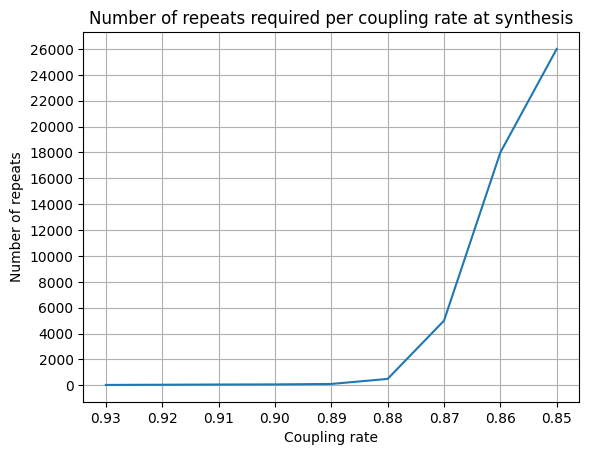

In [349]:
plt.plot(coupling_rates[6:], repeats[6:])
plt.gca().invert_xaxis()
plt.grid()
plt.yticks(np.arange(0, 27000, 2000))
plt.xlabel("Coupling rate")
plt.ylabel("Number of repeats")
plt.title("Number of repeats required per coupling rate at synthesis")